# EDA: Approval Data

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

path = 'final_data/clean_approval_data.csv'
approval_df = pd.read_csv(path)
approval_df.head()

,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification *,Submission Status,year,month,ID
0,01/02/2001,VASOCON-ANDA #018746,SUPPL-11,ANTAZOLINE PHOSPHATE; NAPHAZOLINE HYDROCHLORIDE,NOVARTIS,Manufacturing (CMC),Approval,2001,1,NDA018746
1,01/02/2002,LIDOCAINE HYDROCHLORIDE IN PLASTIC CONTAINERAN...,SUPPL-11,LIDOCAINE HYDROCHLORIDE,HOSPIRA,Labeling,Approval,2002,1,NDA088367
2,01/02/2002,LIDOCAINE HYDROCHLORIDE AND EPINEPHRINEANDA #...,SUPPL-4,EPINEPHRINE; LIDOCAINE HYDROCHLORIDE,HOSPIRA,Labeling,Approval,2002,1,NDA089650
3,01/02/2002,LIDOCAINE HYDROCHLORIDE AND EPINEPHRINEANDA #...,SUPPL-4,EPINEPHRINE; LIDOCAINE HYDROCHLORIDE,HOSPIRA,Labeling,Approval,2002,1,NDA089649
4,01/02/2003,SULFINPYRAZONEANDA #087665,SUPPL-22,SULFINPYRAZONE,BARR,Labeling,Approval,2003,1,NDA087665


## Number of Approvals Month-wise

### Faceted by Year

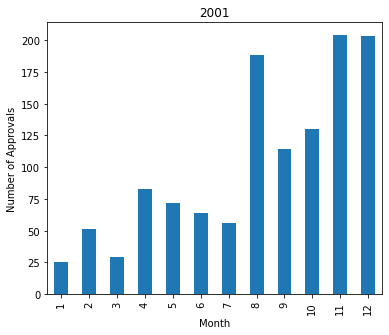

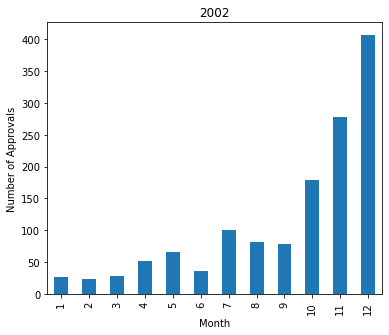

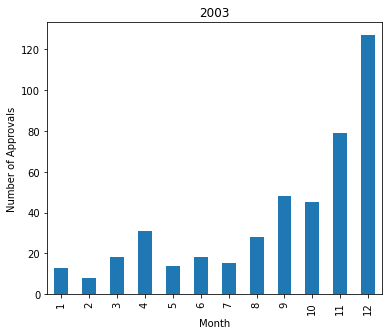

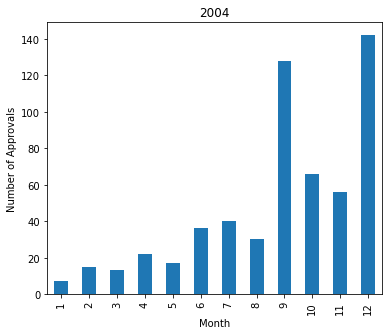

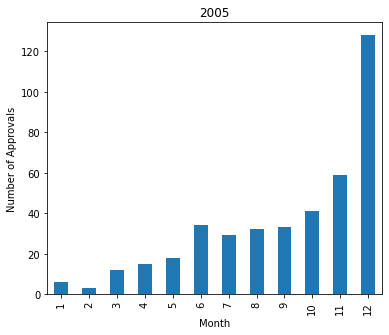

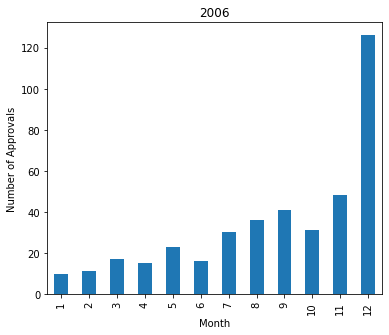

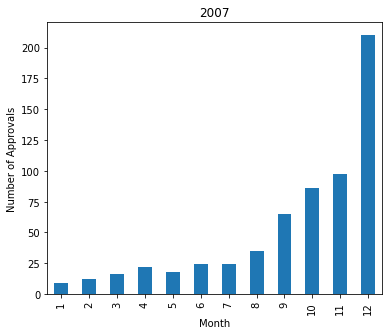

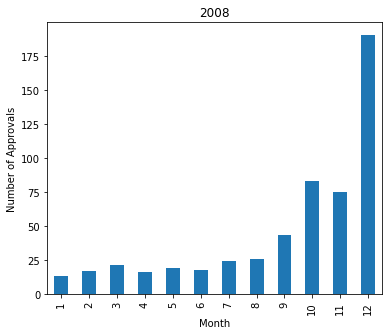

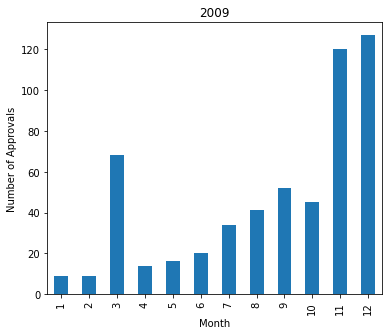

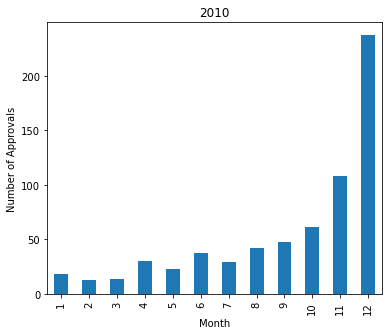

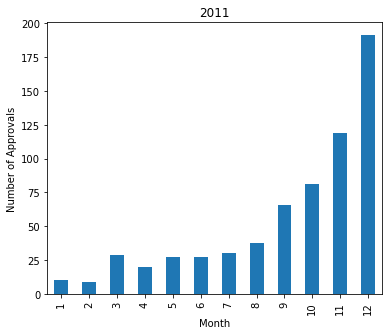

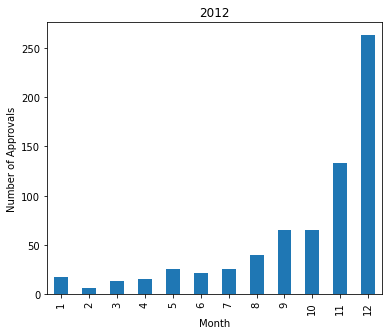

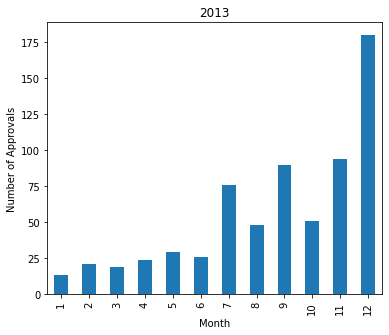

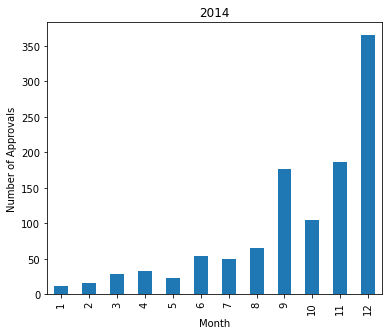

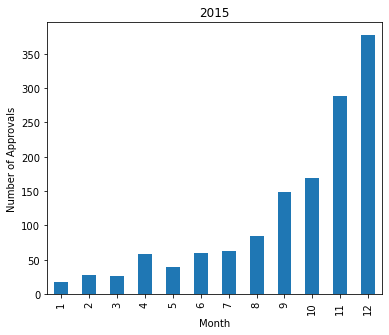

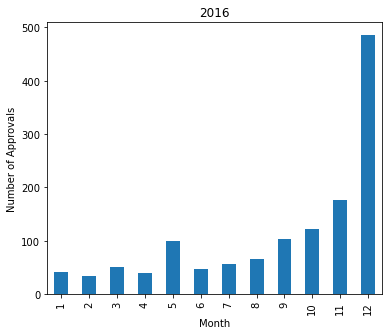

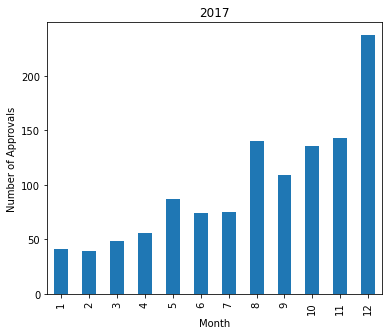

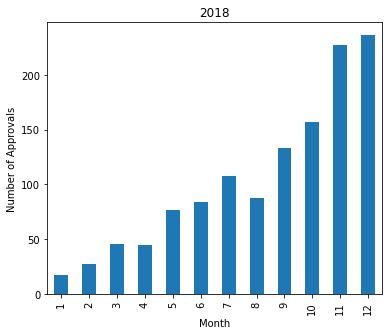

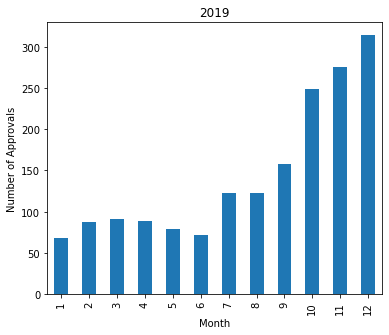

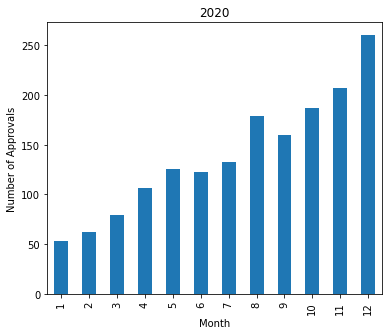

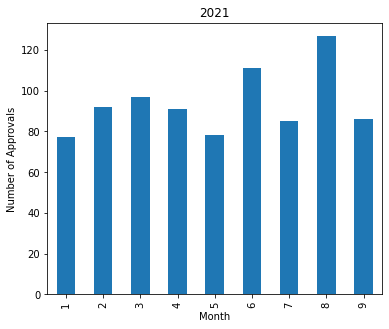

In [2]:
years = range(2001, 2022, 1)

for year in years:
    temp_df = approval_df[approval_df["year"]==year]
    dfg = temp_df.groupby(['month']).size()

    dfg.plot(kind='bar', title=year, ylabel='Number of Approvals',
         xlabel='Month', figsize=(6, 5))
    plt.show()

### Across all years

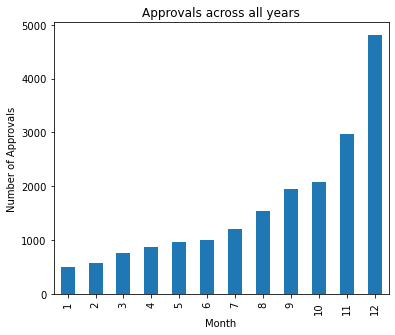

In [3]:
dfg = approval_df.groupby(['month']).size()

dfg.plot(kind='bar', title="Approvals across all years", ylabel='Number of Approvals',
     xlabel='Month', figsize=(6, 5))
plt.show()

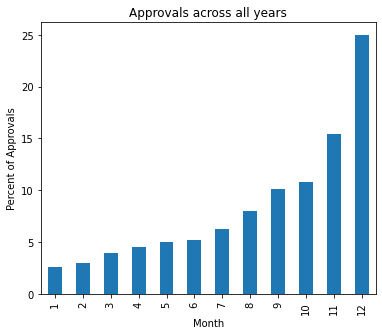

In [4]:
dfg = approval_df.groupby(['month']).size().transform(lambda x: x*100/sum(x))

dfg.plot(kind='bar', title="Approvals across all years", ylabel='Percent of Approvals',
     xlabel='Month', figsize=(6, 5))
plt.savefig("./EDA/Percent_approvals_all_years")
plt.show()

## Number of Approvals By Day of Month

In [5]:
approval_df["Day of Month"] = approval_df["Approval Date"].str.split("/", n = 2, expand = True)[1]

In [6]:
bins = [0, 15, 31]
approval_df['Day of Month Binned'] = pd.cut(approval_df['Day of Month'].astype(int), bins)

### Faceted by Year: Vertical Stacked Bar plot

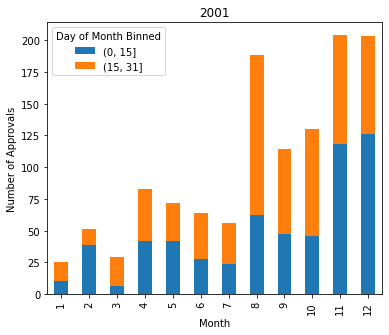

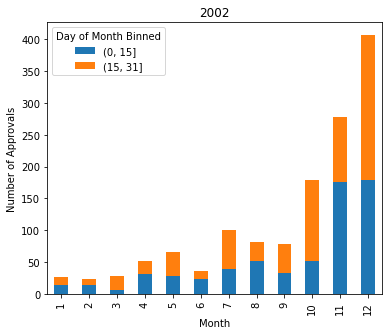

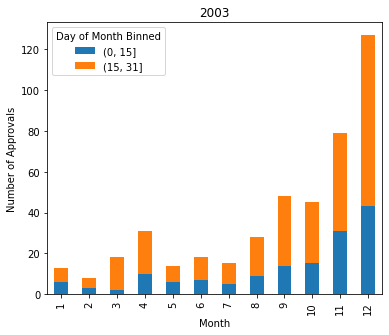

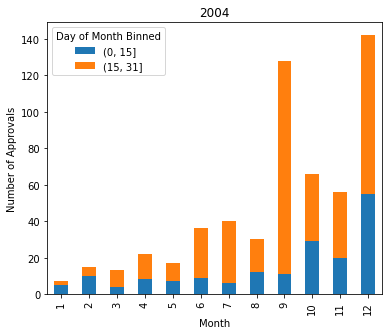

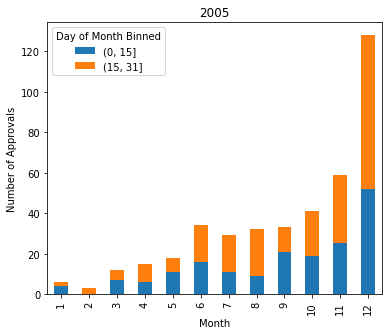

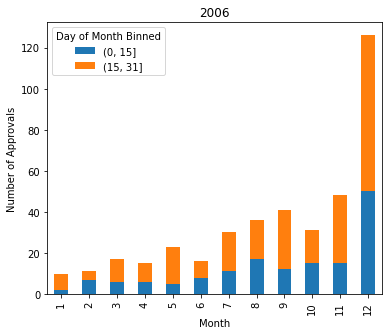

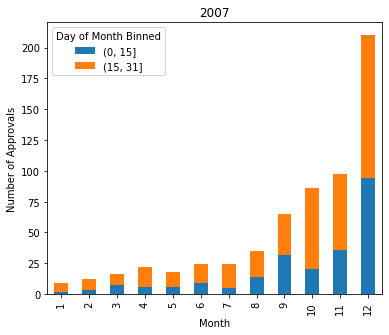

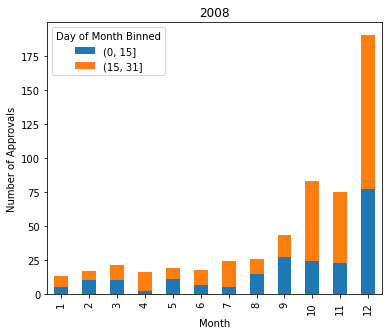

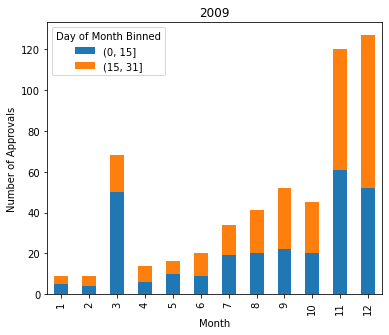

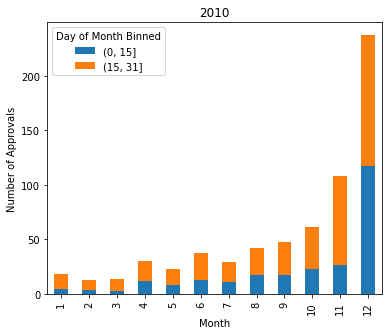

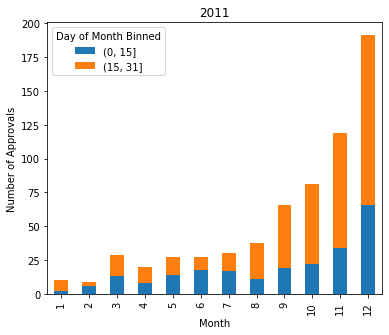

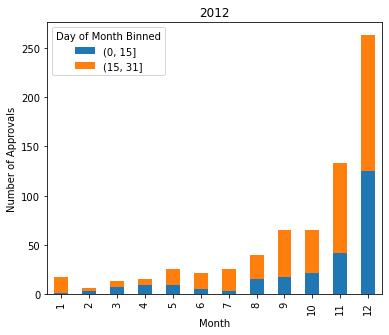

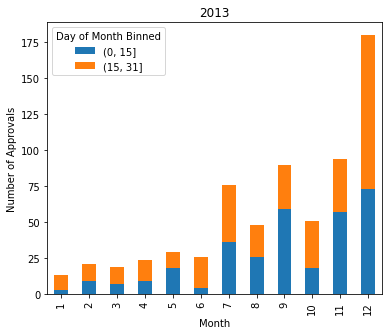

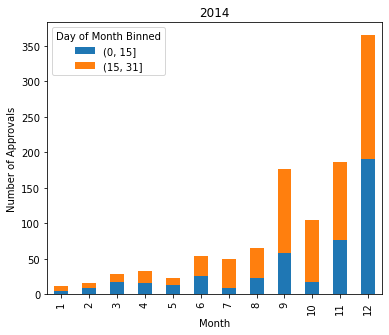

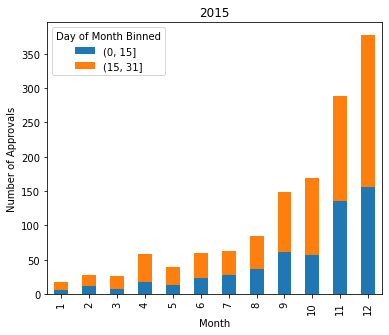

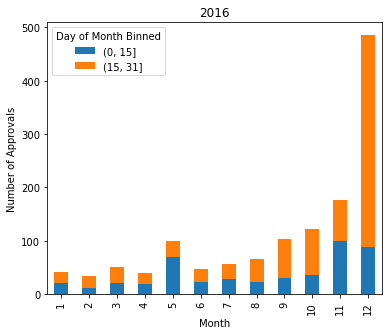

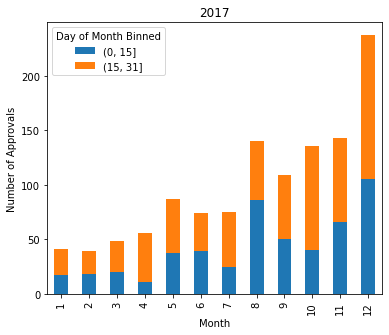

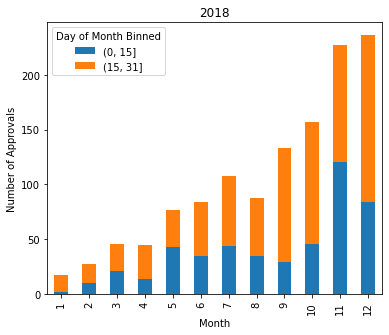

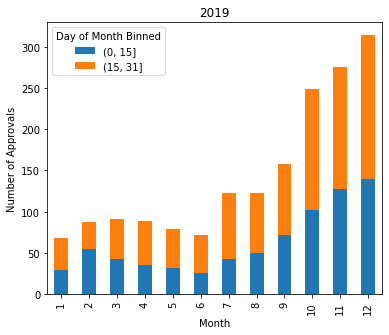

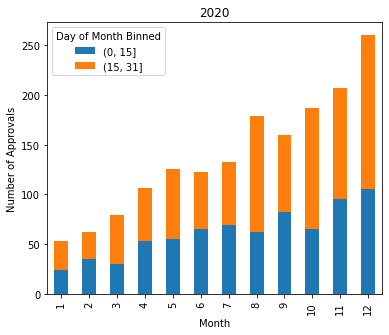

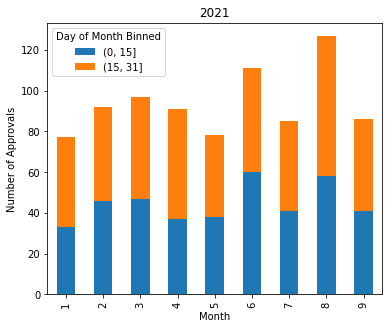

In [7]:
years = range(2001, 2022, 1)

for year in years:
    temp_df = approval_df[approval_df["year"]==year]
    dfg = temp_df.groupby(['month', 'Day of Month Binned']).size().unstack().fillna(0)

    dfg.plot.bar(title=year, ylabel='Number of Approvals',
         xlabel='Month', figsize=(6, 5), stacked=True)
    plt.savefig("./EDA/MonthSplit/"+str(year))
    plt.show()

### Faceted by Year: Horizontal Stacked Bar plot

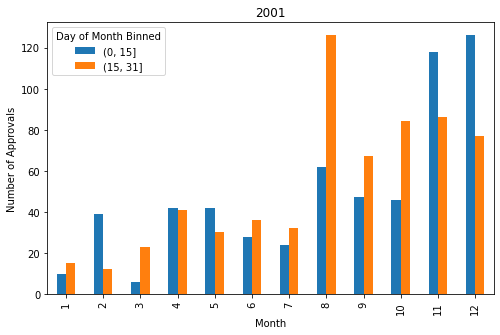

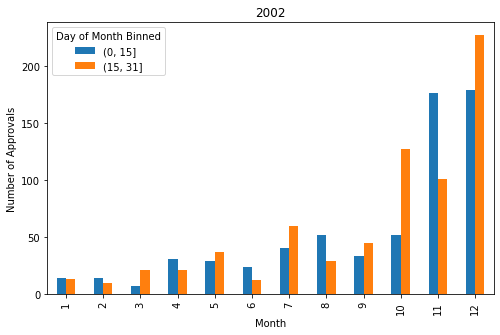

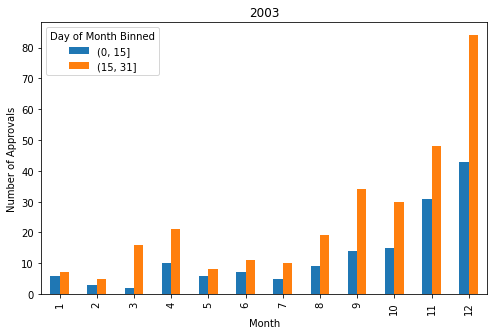

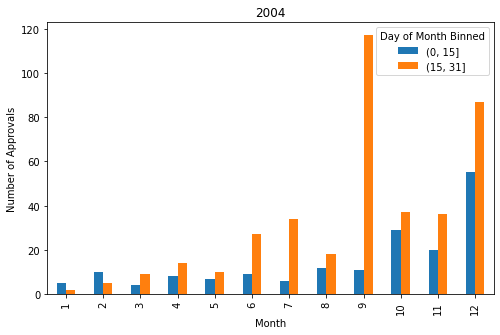

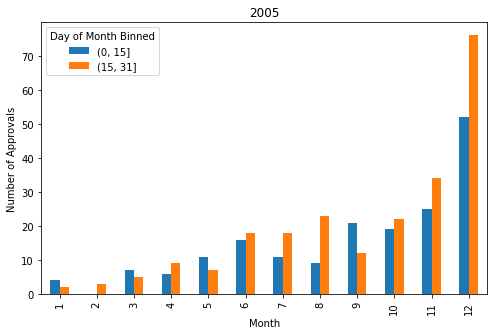

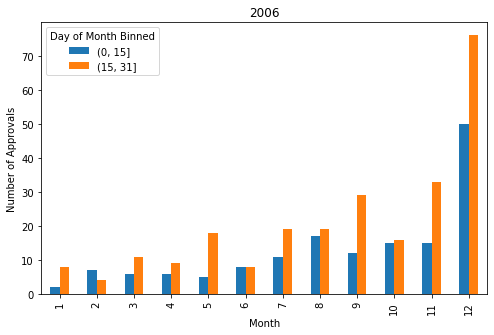

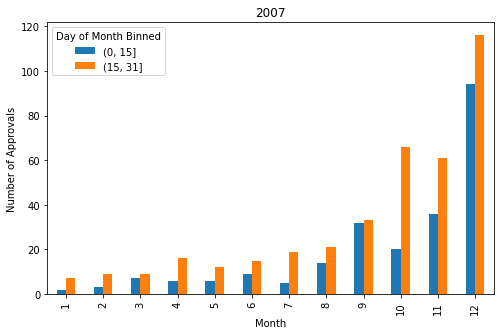

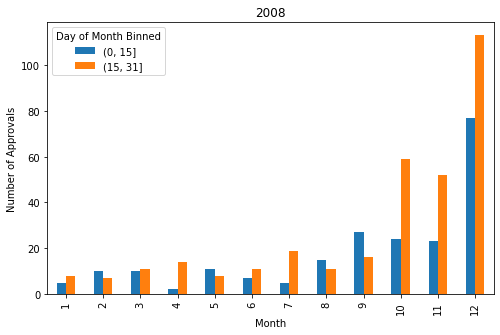

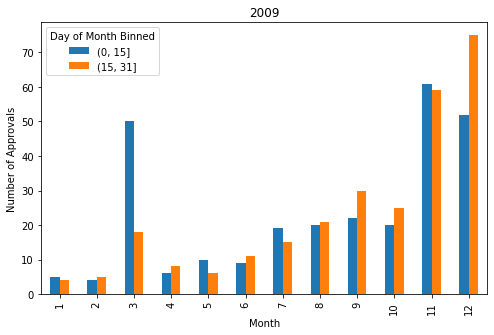

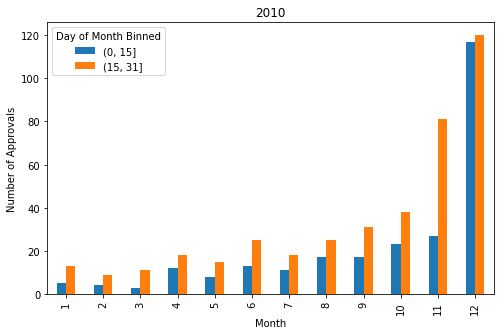

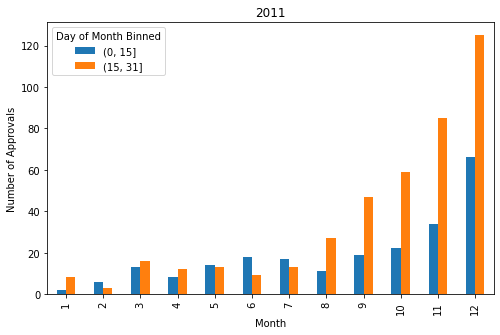

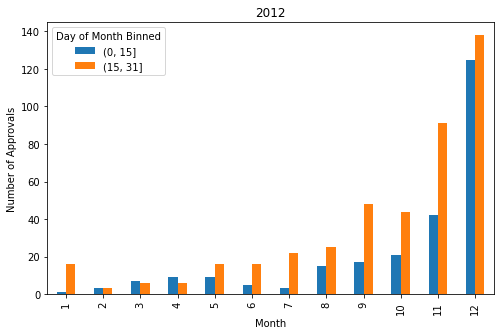

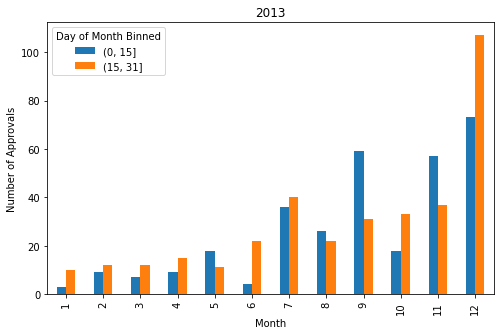

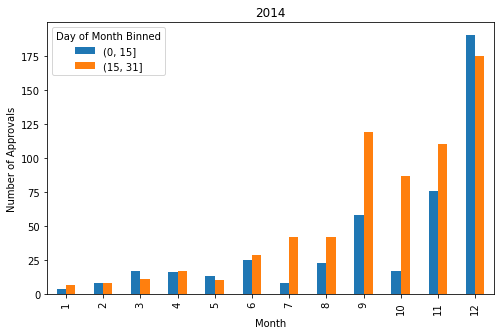

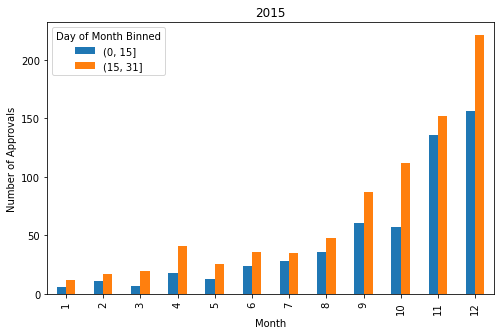

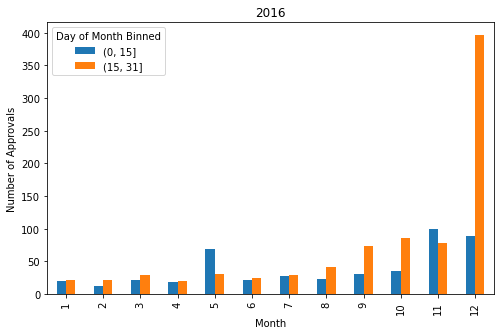

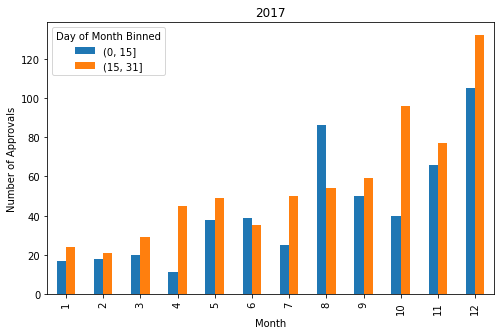

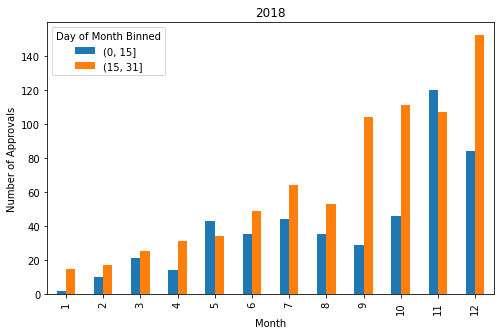

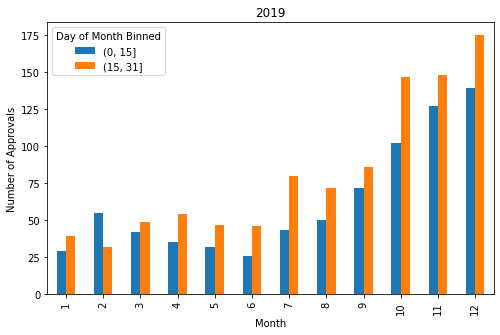

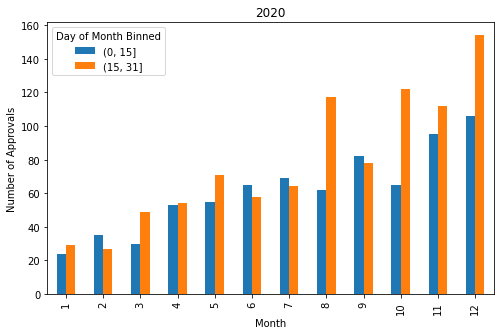

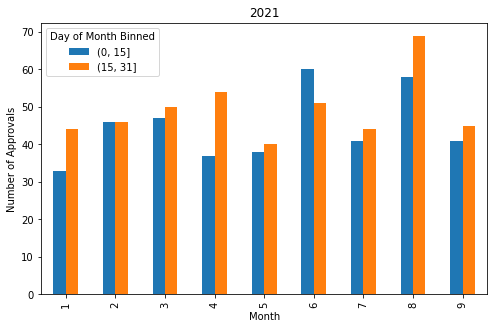

In [8]:
years = range(2001, 2022, 1)

for year in years:
    temp_df = approval_df[approval_df["year"]==year]
    dfg = temp_df.groupby(['month', 'Day of Month Binned']).size().unstack().fillna(0)

    dfg.plot.bar(title=year, ylabel='Number of Approvals',
         xlabel='Month', figsize=(8, 5))
    plt.savefig("./EDA/MonthSplitSidebySide/"+str(year))
    plt.show()

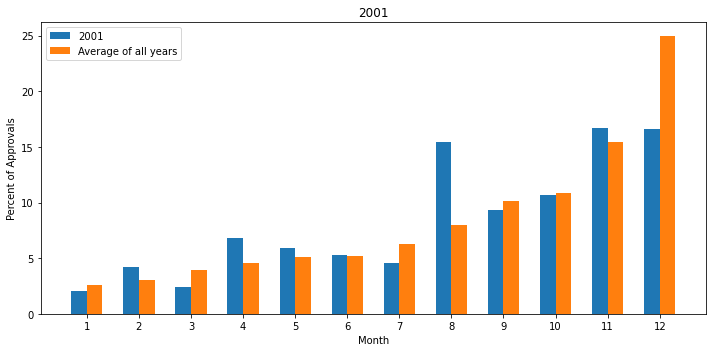

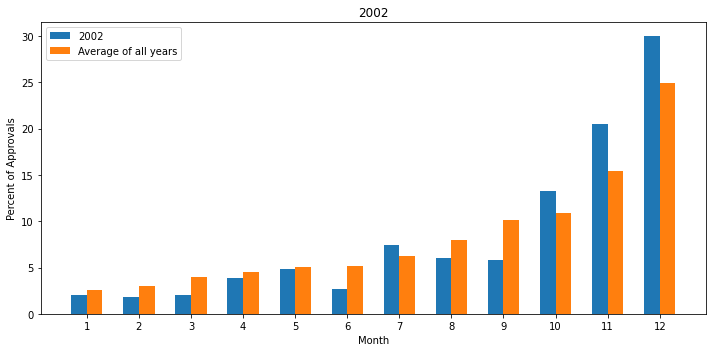

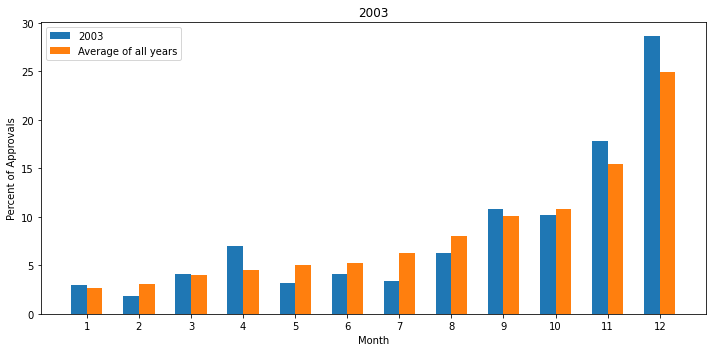

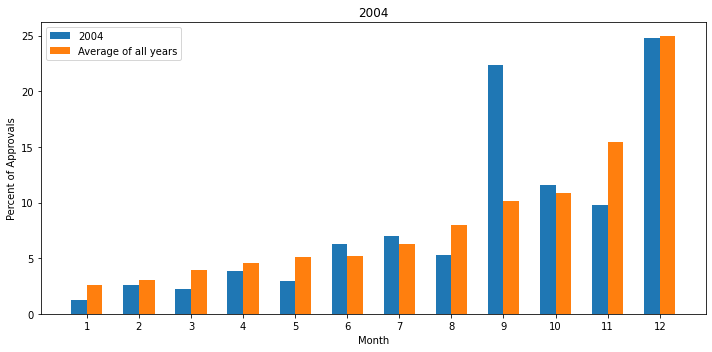

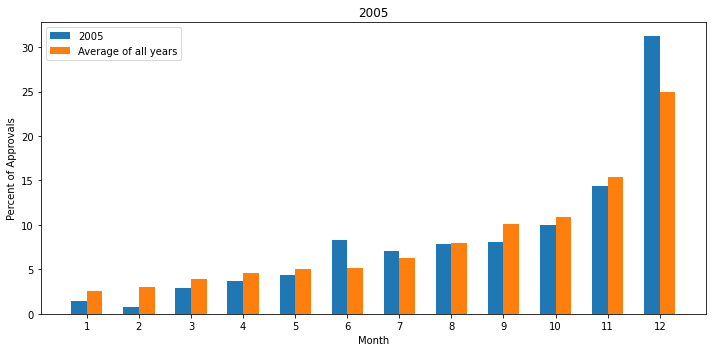

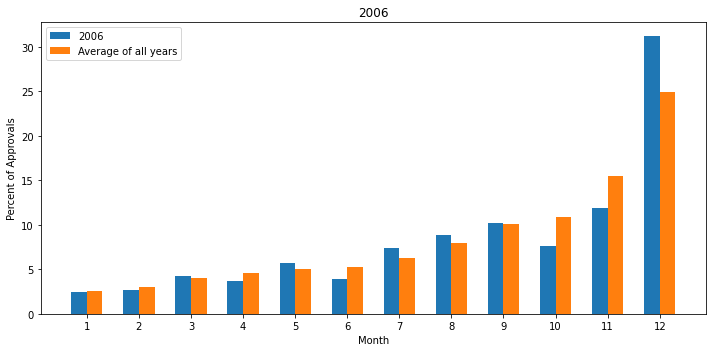

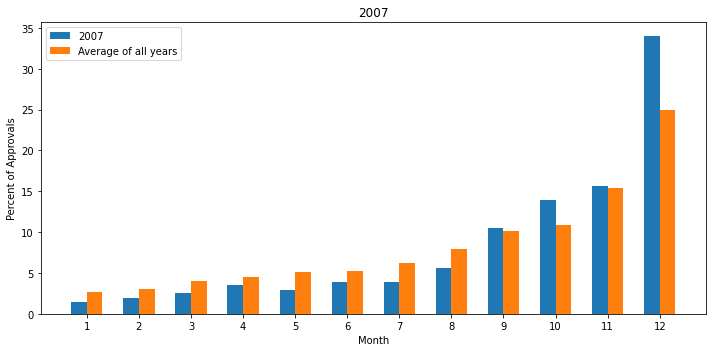

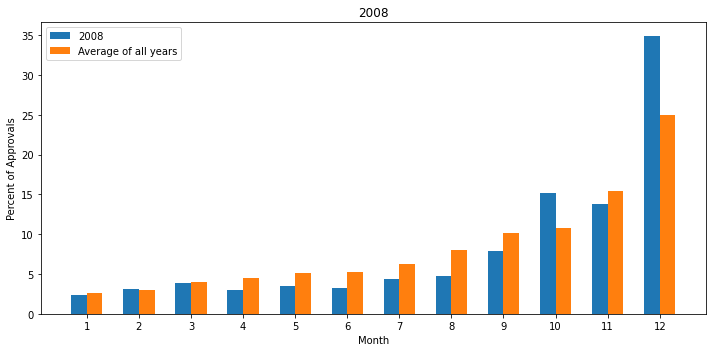

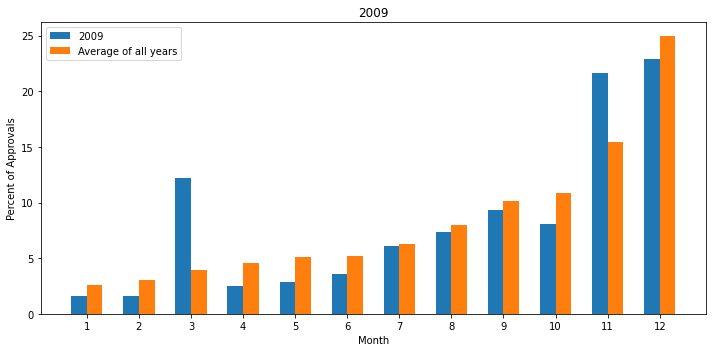

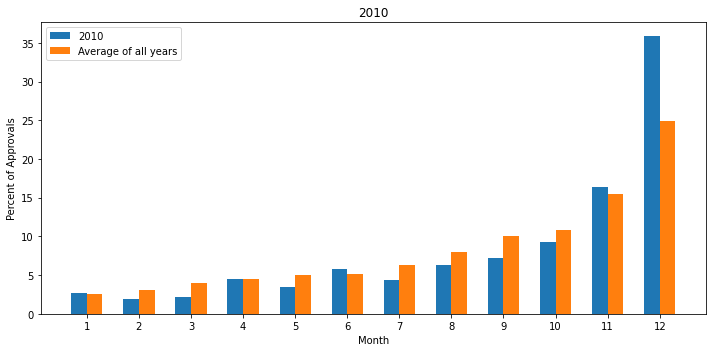

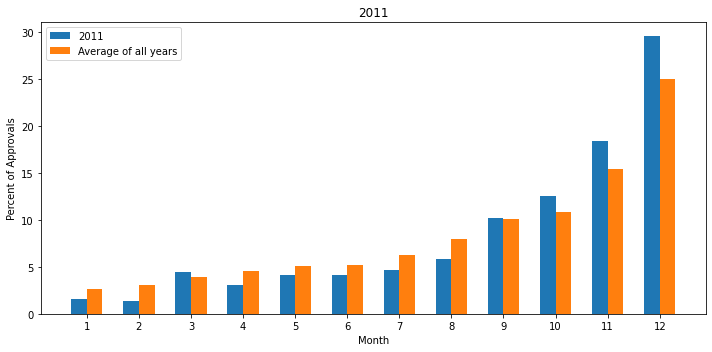

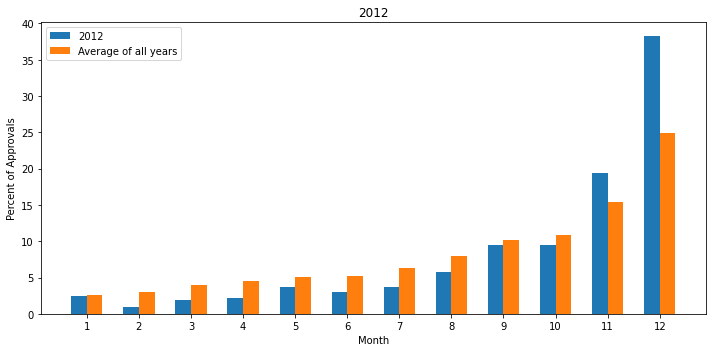

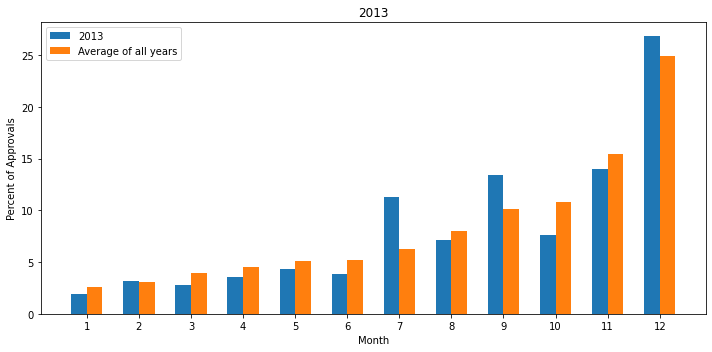

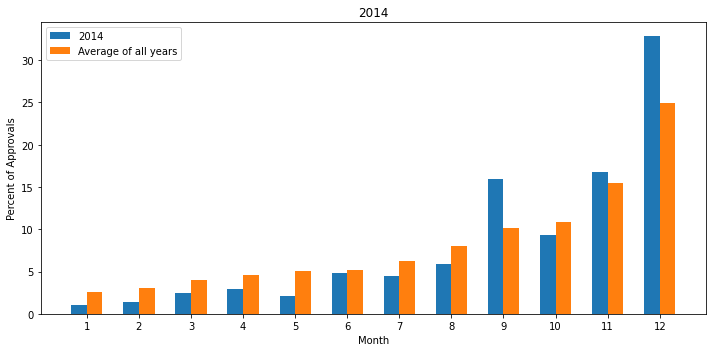

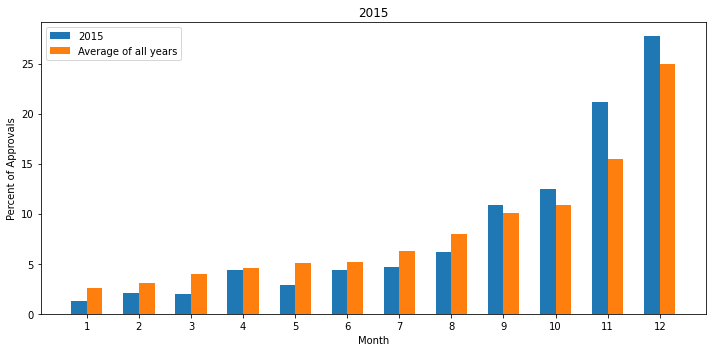

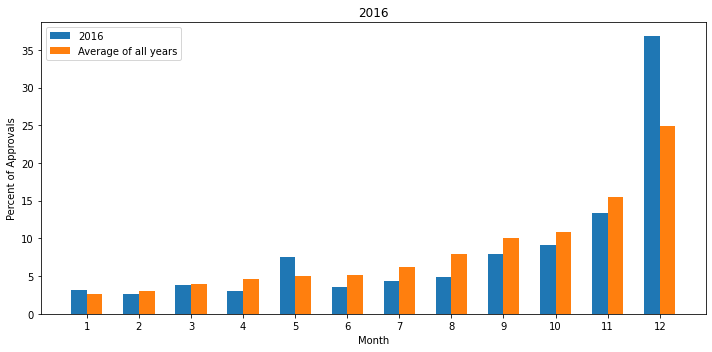

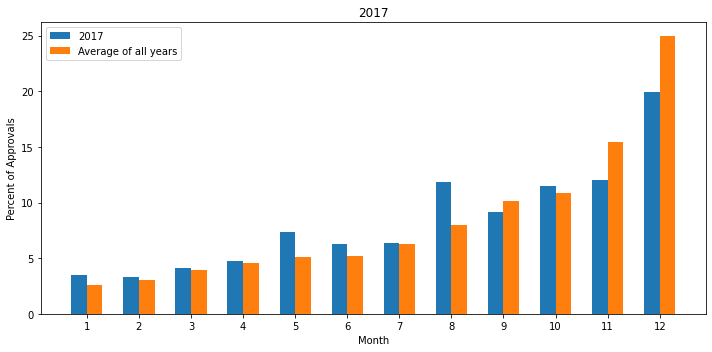

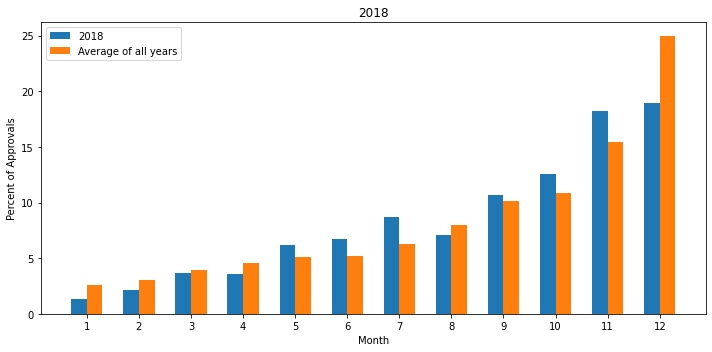

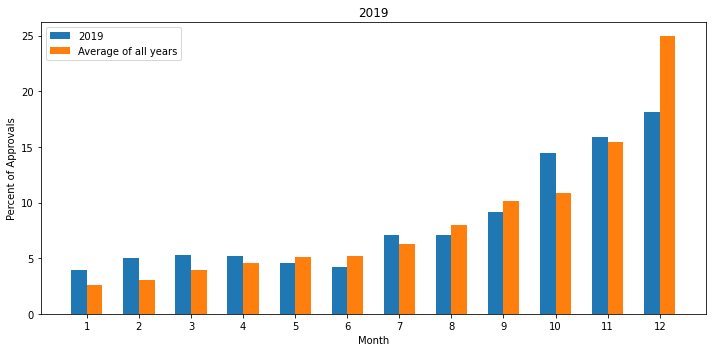

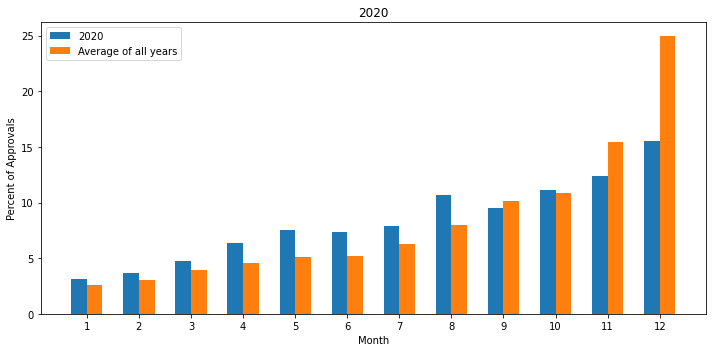

In [9]:
years = range(2001, 2021, 1)

all_years = approval_df.groupby(['month']).size().transform(lambda x: x*100/sum(x))


index = np.arange(1, 13)
bar_width = 0.3

for year in years:
    temp_df = approval_df[approval_df["year"]==year]
    dfg = temp_df.groupby(['month']).size().transform(lambda x: x*100/sum(x))

    plt.figure(figsize=(10, 5))
    plt.bar(index - bar_width / 2, dfg.values, bar_width, label=year)
    plt.bar(index + bar_width / 2, all_years.values, bar_width, label='Average of all years')
    plt.title(year)
    plt.ylabel("Percent of Approvals")
    plt.xlabel("Month")
    plt.xticks(index)
    plt.legend()
    plt.savefig("./EDA/MonthSplitBaseline/"+str(year))
    plt.tight_layout()
    plt.show()